In [2]:
from numpy import *
from matplotlib.pyplot import *
import pickle
import os

# Loading the data

The simulation workers dump their results to disk every few seconds. To load all the results from a simulation, we have to unpickle all relevant pkl files. Here we assemble all found ray hit coordinates in the `allPoints` array:

In [13]:
allPoints = None
for r, ds, fs in os.walk('main.opticalSimulationResults/run-0000-raw'):
  for f in fs:
    if f.endswith('.pkl'):
      with open(f'{r}/{f}', 'rb') as _f:
        blob = pickle.load(_f)
        allPoints = concatenate([allPoints, blob['points']]) if allPoints is not None else blob['points']

In [14]:
allPoints.shape

(11366, 3)

# Plot the results

After loading the data, we can apply any data analysis tools to visualize or further analyze the data. For example we can plot a 2d histogram of the X and Y coordiates:

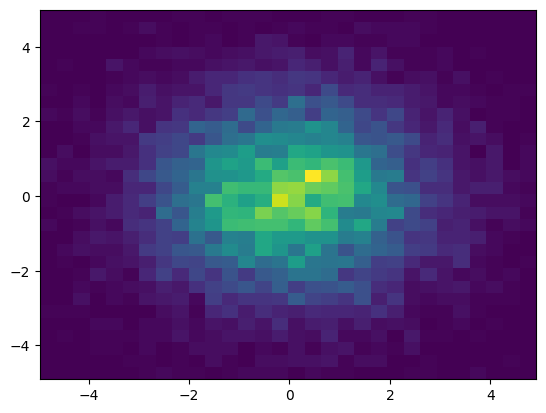

In [26]:
hist2d(*allPoints[:,:2].T, bins=30);